In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (14,8)
%matplotlib inline

In [2]:
data = pd.read_excel(r"D:\ExcelR Assignments\Question\Decision Tree\Decision Tree\heart_disease.xlsx", sheet_name = 'Heart_disease')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [4]:
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [5]:
data.duplicated().sum()

np.int64(1)

In [6]:
data.drop_duplicates(keep='first', inplace = True)

In [7]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [8]:
data['oldpeak'].isnull().sum()/(data.shape[0]) * 100

np.float64(6.835722160970231)

In [9]:
data['oldpeak'].fillna(data['oldpeak'].median(), inplace = True)

In [10]:
data['oldpeak'].isnull().sum()

np.int64(0)

### EDA

In [11]:
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

<Axes: >

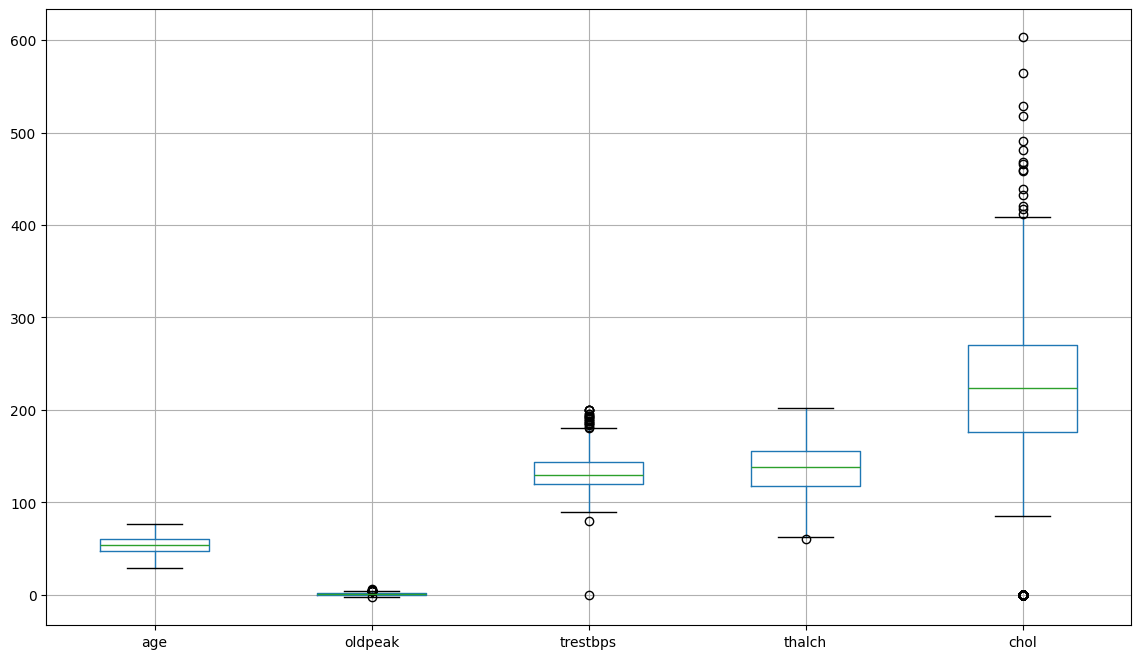

In [12]:
data.boxplot(['age','oldpeak','trestbps','thalch','chol'])

In [13]:
data.nunique()

age          49
sex           2
cp            4
trestbps     85
chol        228
fbs           2
restecg       3
thalch      122
exang         4
oldpeak      53
slope         3
thal          3
num           5
dtype: int64

In [16]:
data.nunique()

age          49
sex           2
cp            4
trestbps     85
chol        228
fbs           2
restecg       3
thalch      122
exang         4
oldpeak      53
slope         3
thal          3
num           5
dtype: int64

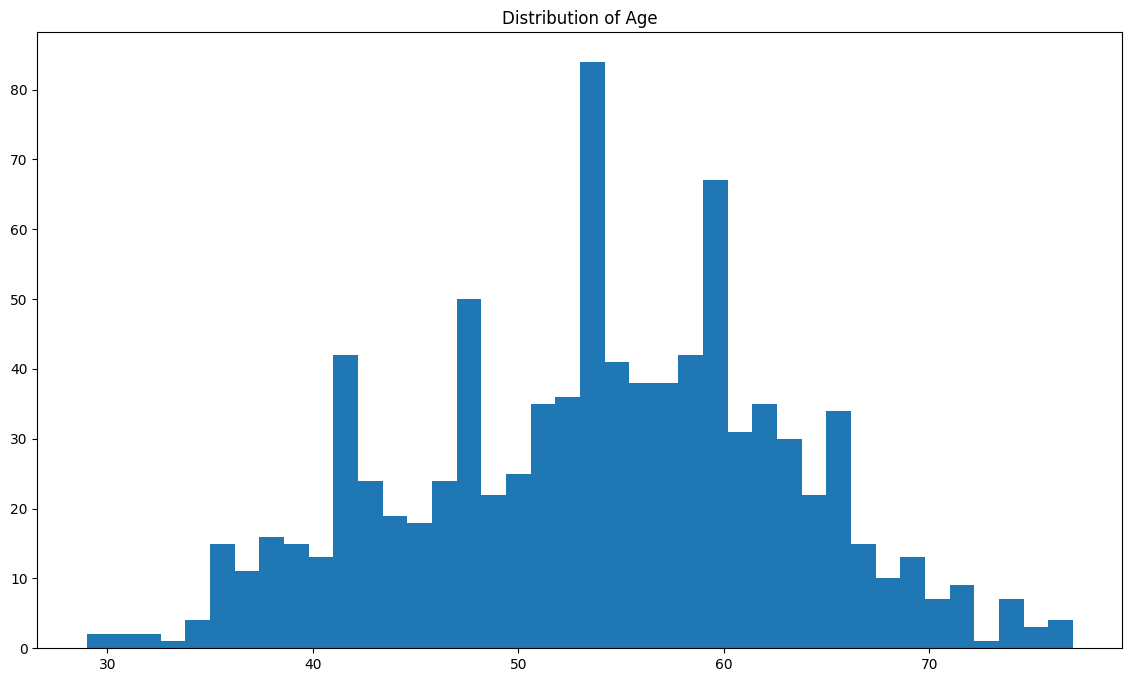

In [17]:
plt.title('Distribution of Age')
plt.hist(data['age'], bins = 40);

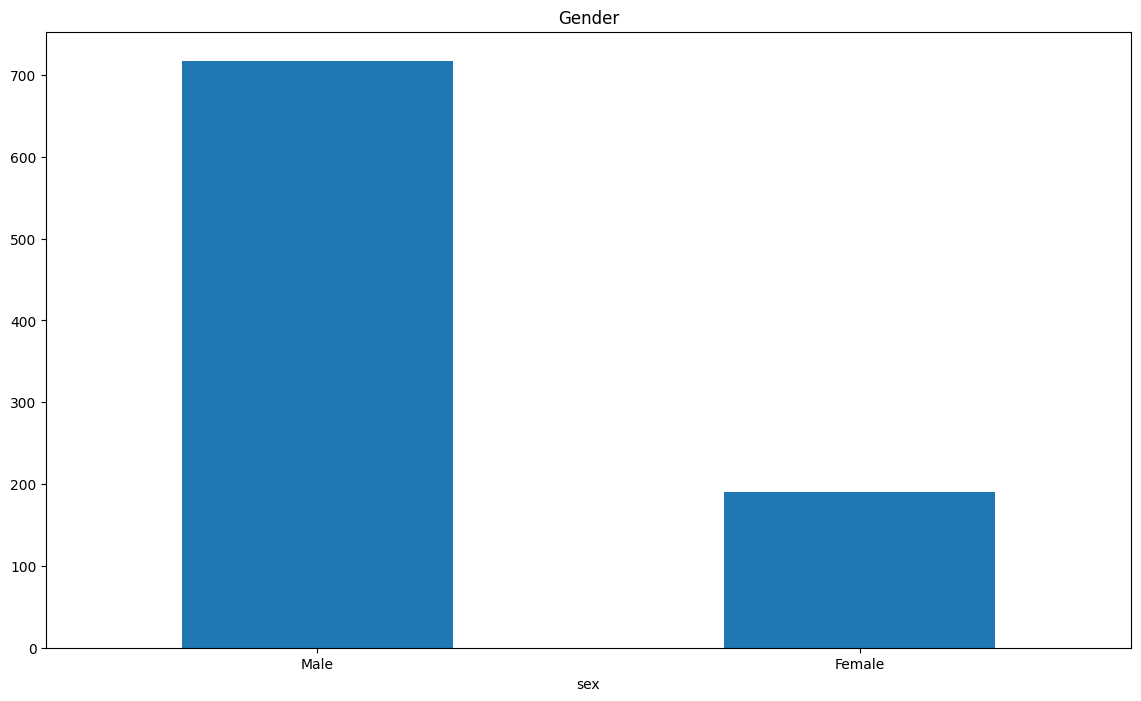

In [18]:
data['sex'].value_counts().plot(kind = 'bar')
plt.title('Gender')
plt.xticks(rotation = 0);

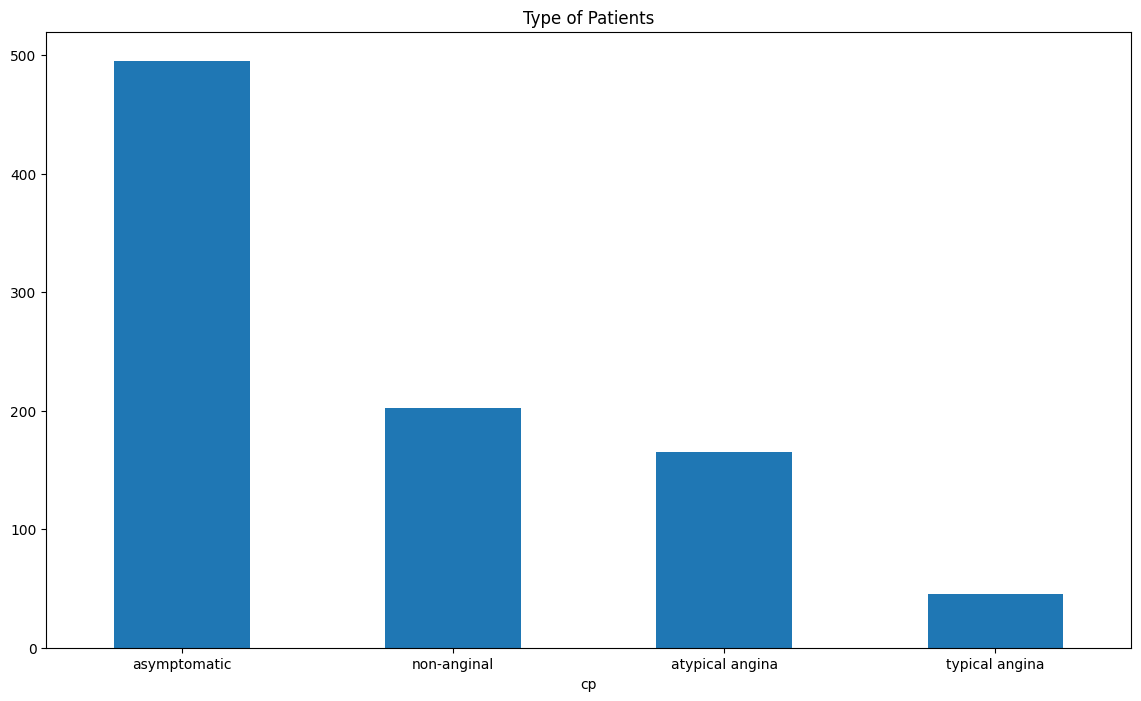

In [19]:
data['cp'].value_counts().plot(kind = 'bar')
plt.title('Type of Patients')
plt.xticks(rotation = 0);

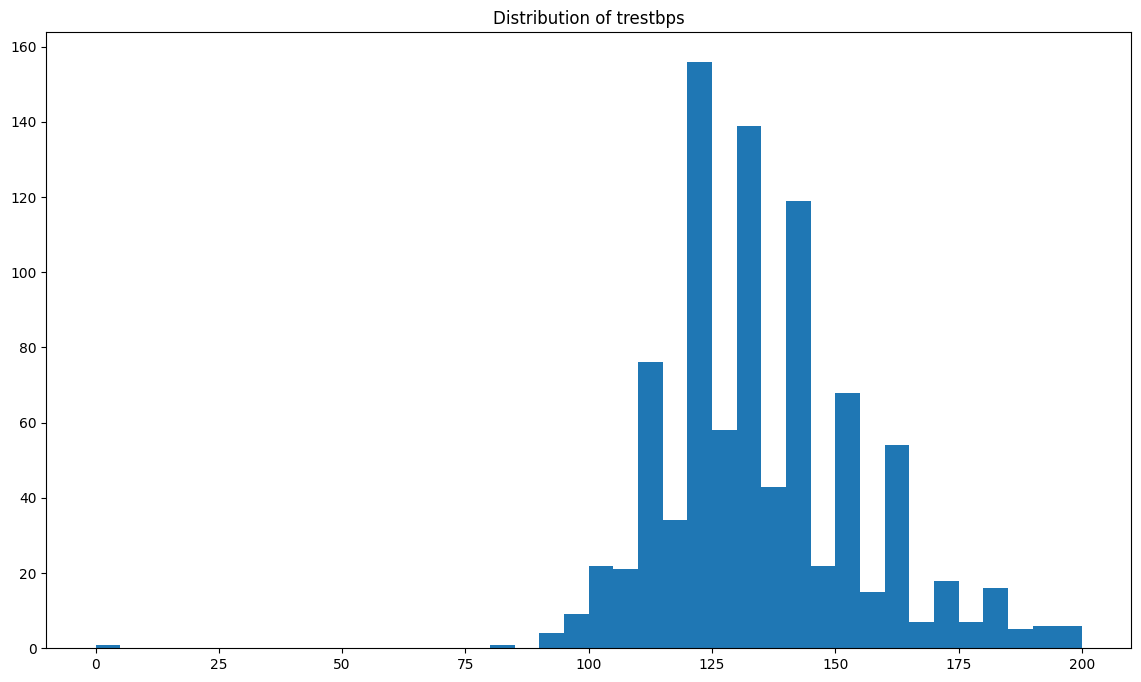

In [20]:
plt.title('Distribution of trestbps')
plt.hist(data['trestbps'], bins = 40);

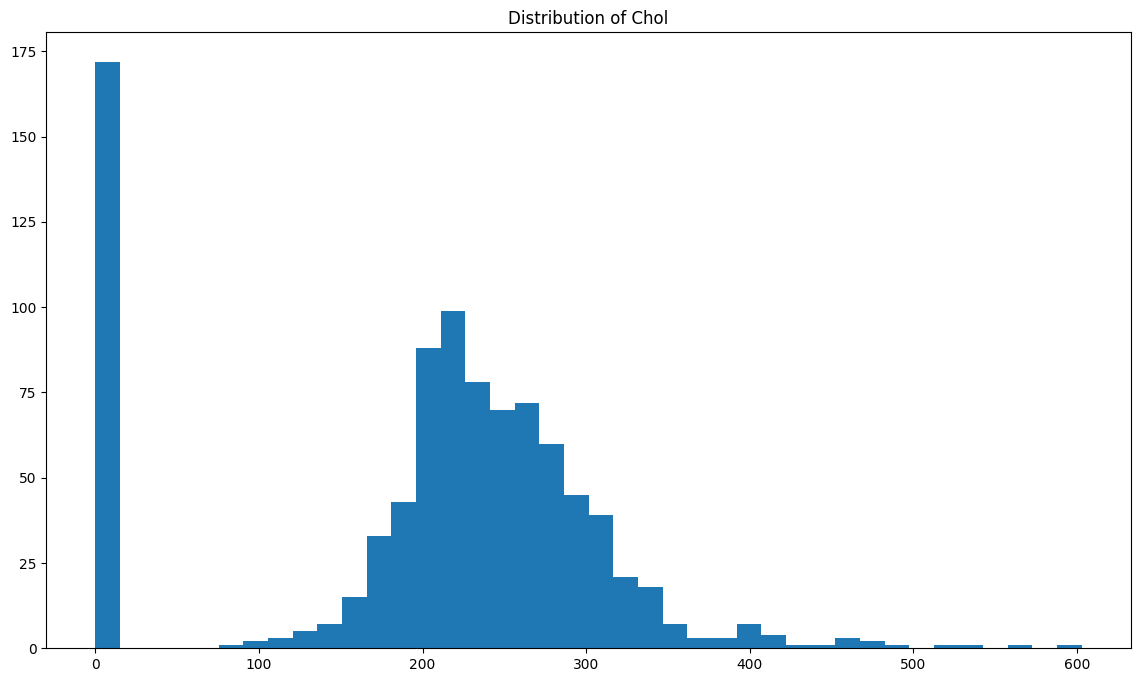

In [21]:
plt.title('Distribution of Chol')
plt.hist(data['chol'], bins = 40);

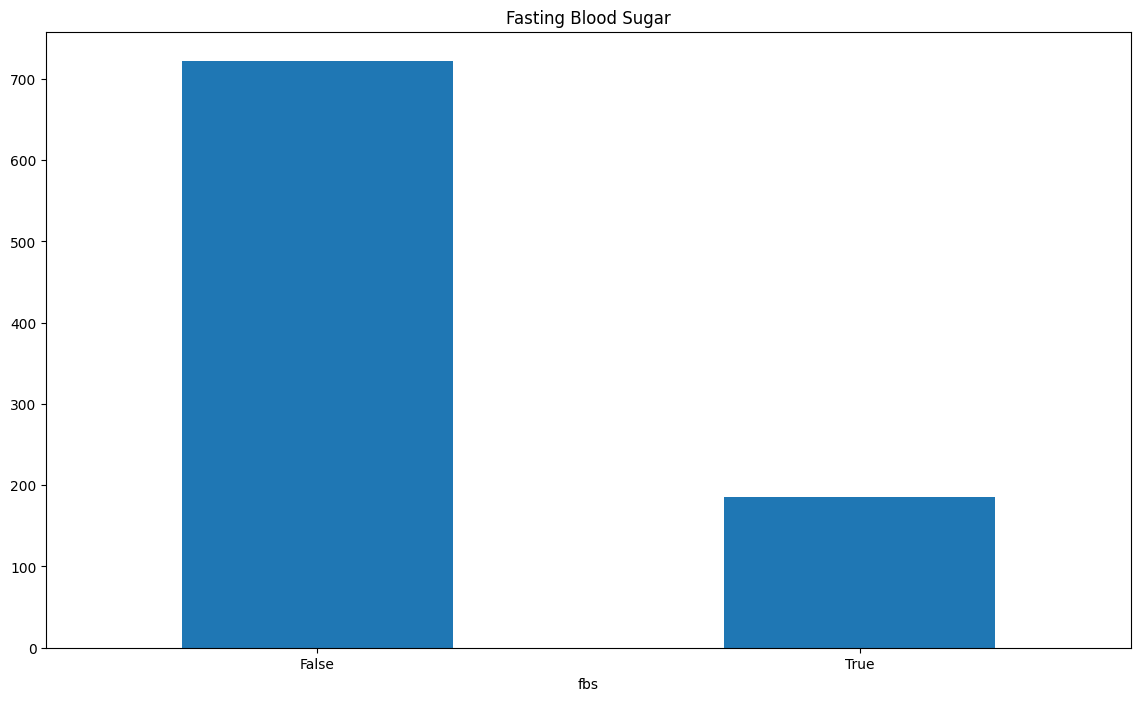

In [22]:
data['fbs'].value_counts().plot(kind = 'bar')
plt.title('Fasting Blood Sugar')
plt.xticks(rotation = 0);

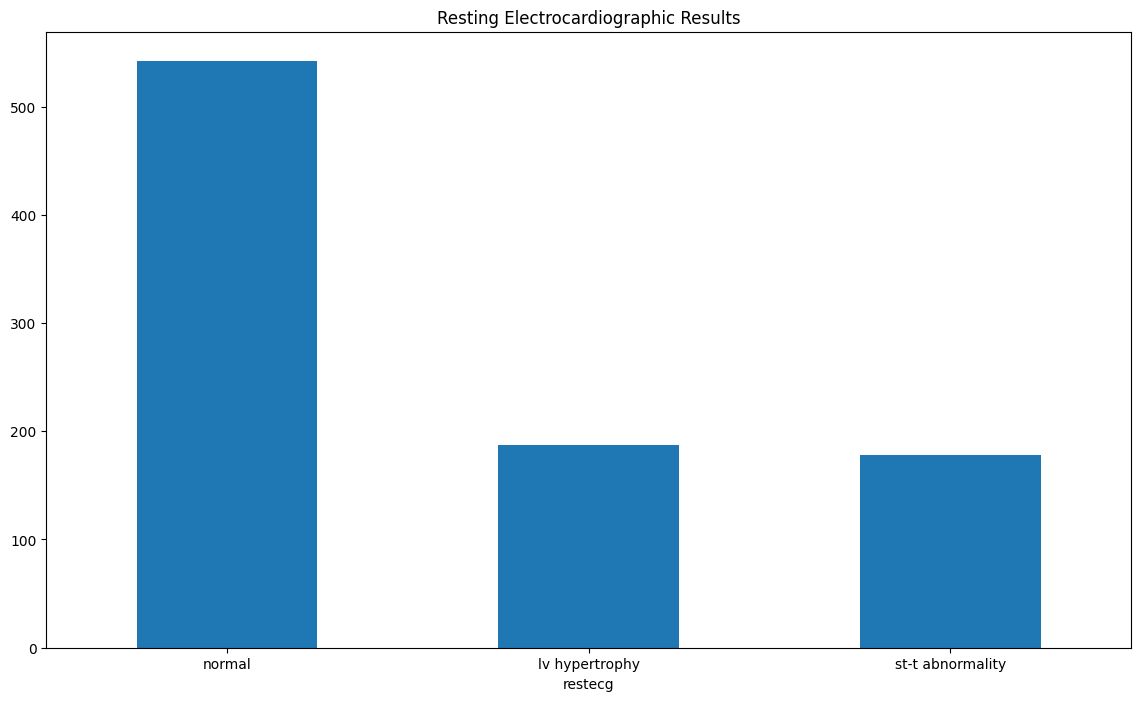

In [23]:
data['restecg'].value_counts().plot(kind = 'bar')
plt.title('Resting Electrocardiographic Results')
plt.xticks(rotation = 0);

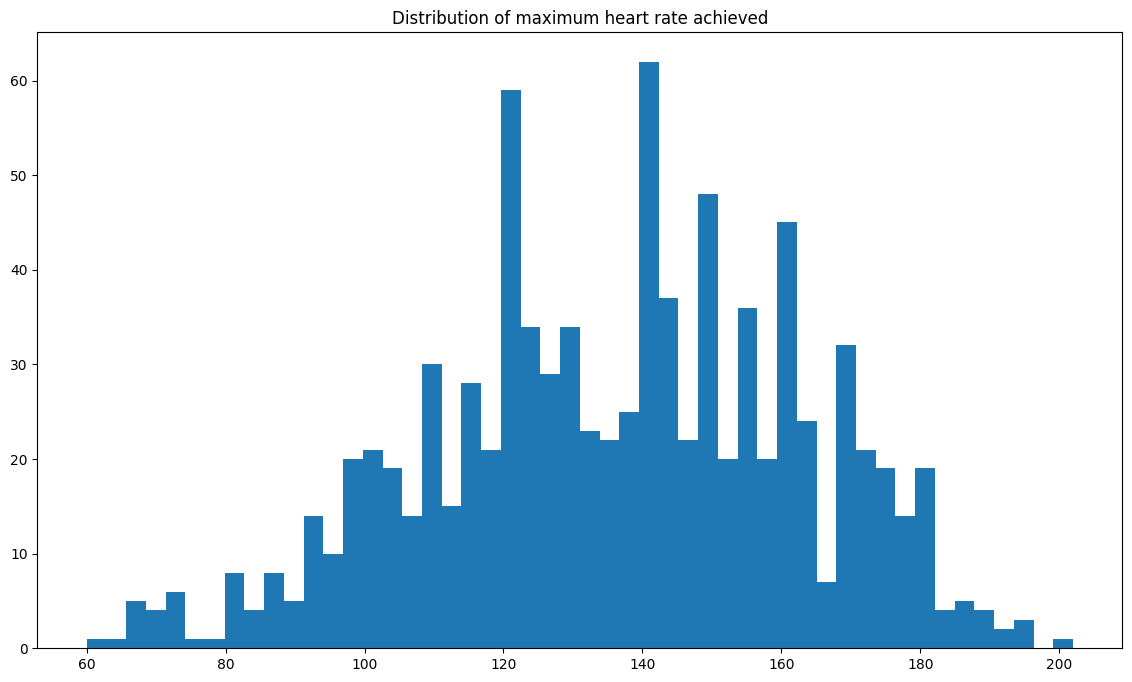

In [24]:
plt.hist(data['thalch'], bins = 50)
plt.title('Distribution of maximum heart rate achieved');

In [25]:
data['exang'] = data['exang'].replace({'TURE' : True , 'FALSE' : False})

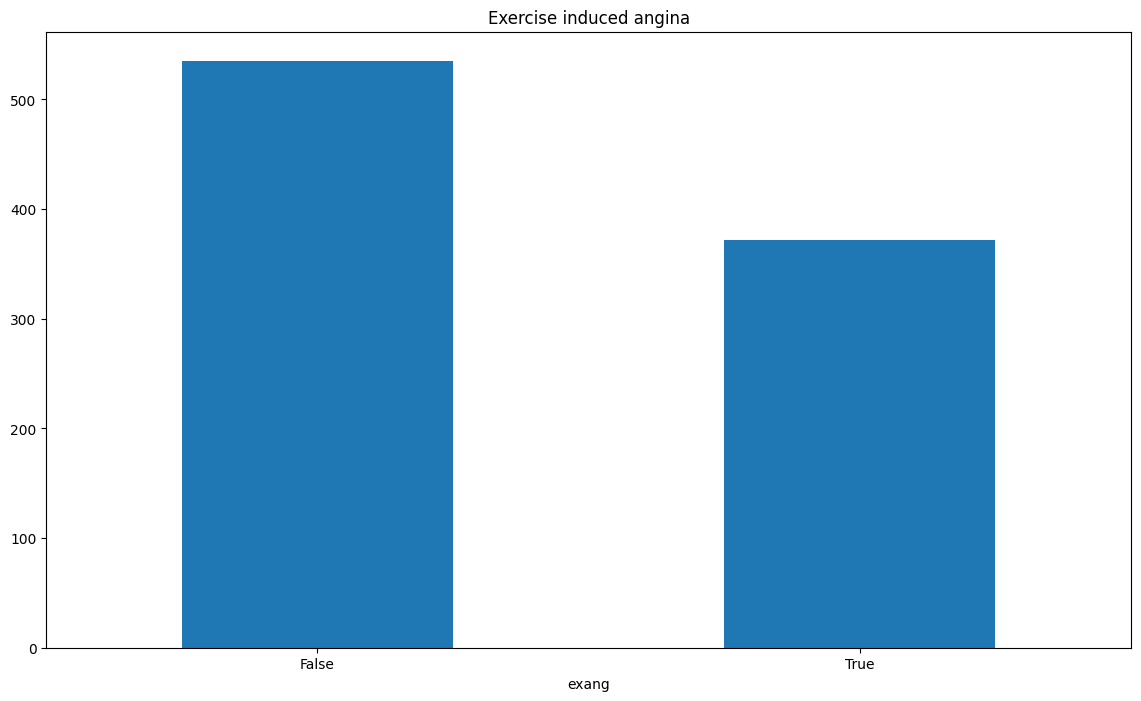

In [26]:
data['exang'].value_counts().plot(kind = 'bar')
plt.title('Exercise induced angina')
plt.xticks(rotation = 0);

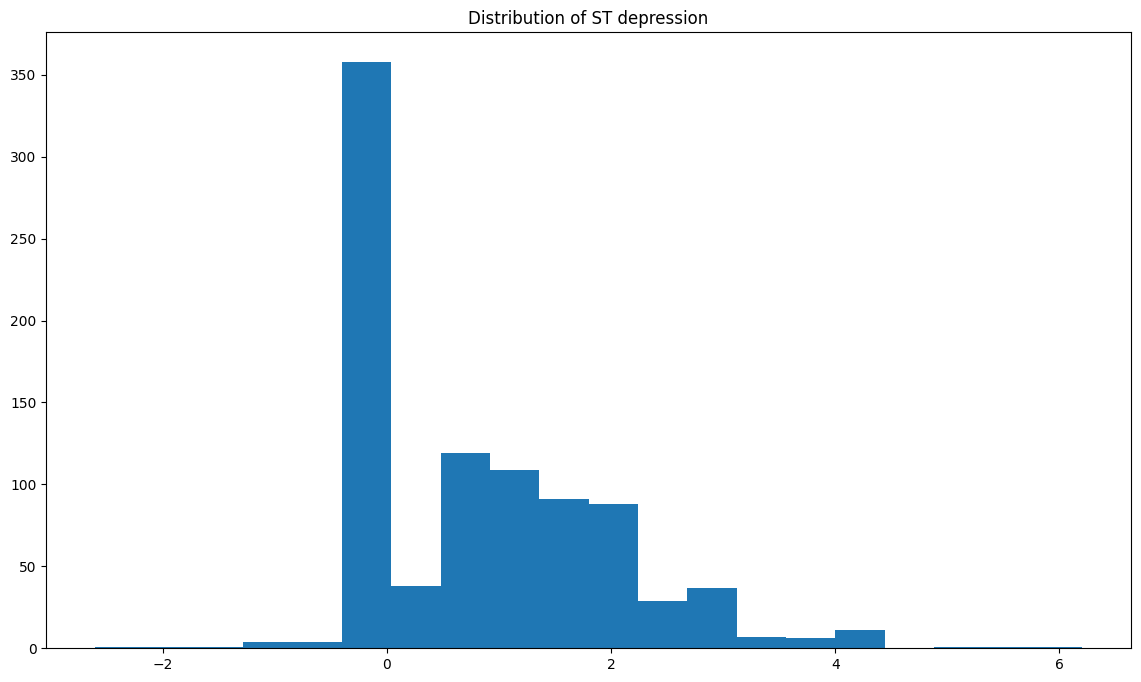

In [27]:
plt.hist(data['oldpeak'], bins = 20)
plt.title('Distribution of ST depression');

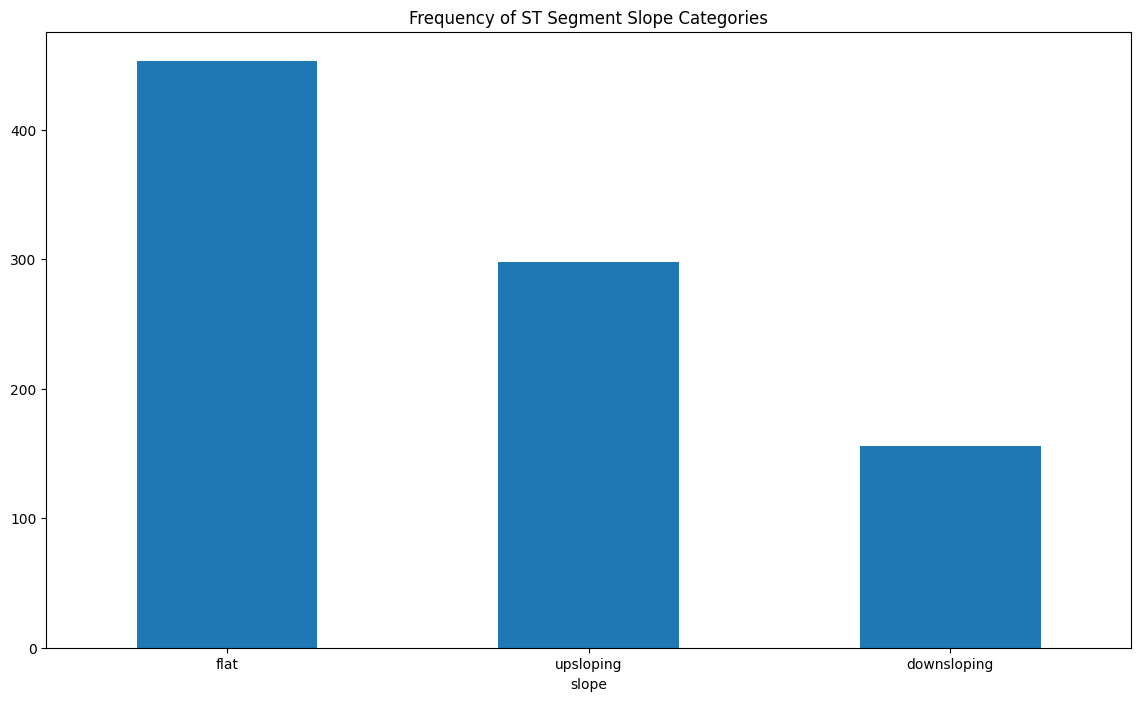

In [28]:
data['slope'].value_counts().plot(kind = 'bar')
plt.title('Frequency of ST Segment Slope Categories')
plt.xticks(rotation = 0);

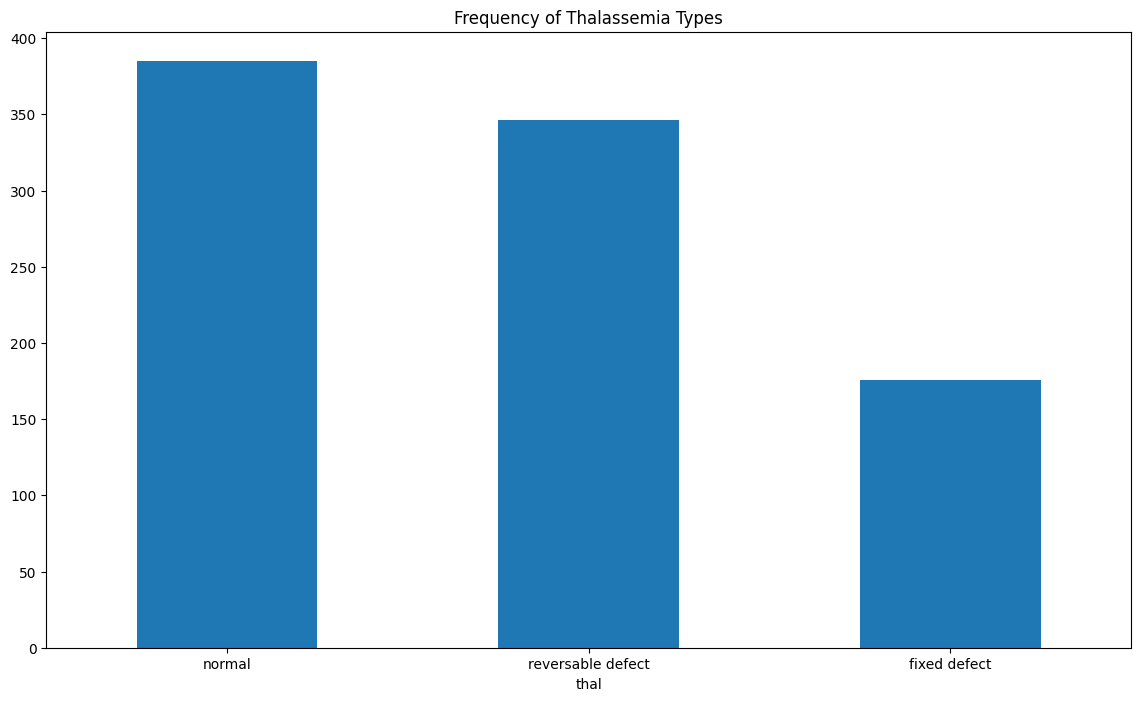

In [29]:
data['thal'].value_counts().plot(kind = 'bar')
plt.title('Frequency of Thalassemia Types')
plt.xticks(rotation = 0);

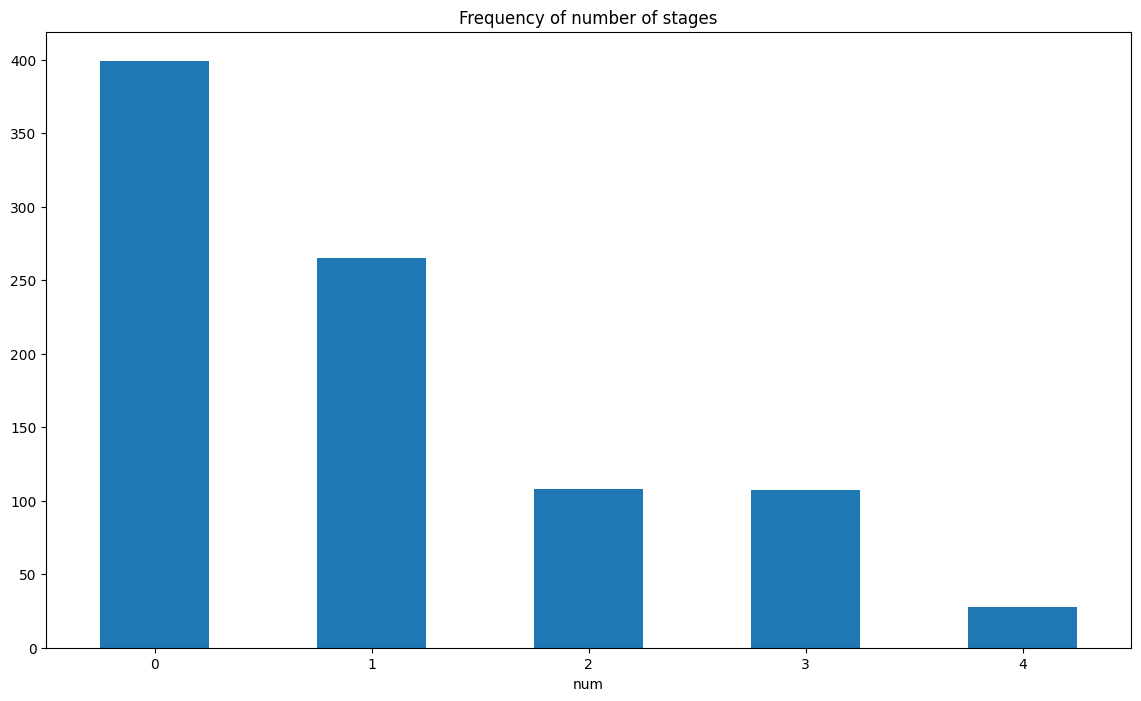

In [30]:
data['num'].value_counts().plot(kind = 'bar')
plt.title('Frequency of number of stages')
plt.xticks(rotation = 0);

<Axes: >

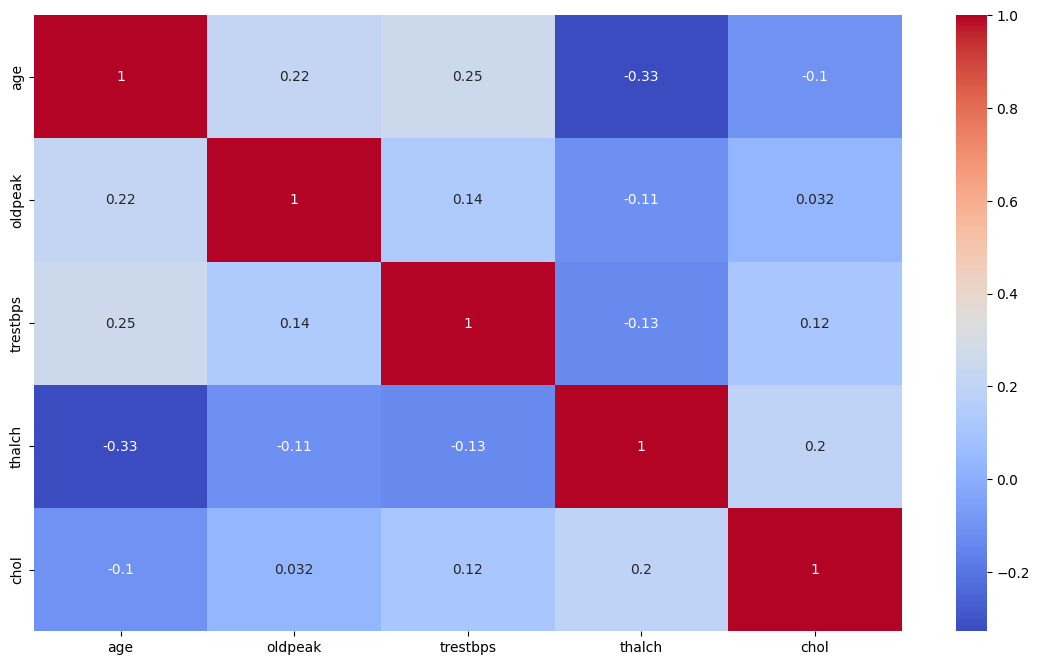

In [31]:
sns.heatmap(data[['age','oldpeak','trestbps','thalch','chol']].corr(), annot = True, cmap = 'coolwarm')

### Encoding

In [32]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,0.5,downsloping,fixed defect,4


In [33]:
data[['fbs', 'exang']] = data[['fbs', 'exang']].astype(int)

In [34]:
encode_col = ['sex','restecg','cp','slope','thal']
data = pd.get_dummies(data, columns = encode_col, drop_first = True).astype(int)

In [35]:
data

,age,trestbps,chol,fbs,thalch,exang,oldpeak,num,sex_Male,restecg_normal,restecg_st-t abnormality,cp_atypical angina,cp_non-anginal,cp_typical angina,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,1,150,0,2,0,1,0,0,0,0,1,0,0,0,0
1,41,135,203,0,132,0,0,0,1,1,0,1,0,0,1,0,0,0
2,57,140,192,0,148,0,0,0,1,1,0,0,0,0,1,0,0,0
3,52,118,186,0,190,0,0,0,1,0,0,0,0,1,1,0,0,0
4,57,110,201,0,126,1,1,0,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,0,120,0,1,4,1,1,0,0,0,0,0,1,0,1
904,62,166,170,0,120,1,3,4,1,0,1,0,0,0,1,0,0,1
905,56,170,0,0,123,1,2,4,1,0,0,0,1,0,0,0,1,0
906,56,144,208,1,105,1,0,4,1,0,1,0,1,0,0,0,0,0


In [36]:
x = data.drop('num', axis = 1)
y = data[['num']]

### Model Building

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 42)

In [38]:
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
y_pred = dt.predict(x_test)

In [40]:
print(f'Training Accuracy : {dt.score(x_train, y_train)}')

Training Accuracy : 1.0


In [41]:
print(f'Testing Accuracy : {dt.score(x_test, y_test)}')

Testing Accuracy : 0.5054945054945055


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73        89
           1       0.35      0.43      0.38        47
           2       0.21      0.20      0.21        20
           3       0.17      0.18      0.17        17
           4       0.43      0.33      0.38         9

    accuracy                           0.51       182
   macro avg       0.38      0.37      0.37       182
weighted avg       0.52      0.51      0.51       182



In [43]:
params = {
    'criterion' : ['entropy','gini'],
    'max_depth' : [3,5,7,9,11],
    'splitter' :['best','random']
}

In [44]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params,
                   verbose=1)

In [45]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'splitter': ['best', 'random']},
             verbose=1)

In [47]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}

In [48]:
dtr = DecisionTreeClassifier(criterion='gini', max_depth=3, splitter='best', random_state=42)

In [49]:
dtr.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [50]:
y_pred_1 = dtr.predict(x_test)

In [51]:
dtr.score(x_train,y_train),dtr.score(x_test,y_test)

(0.593103448275862, 0.5274725274725275)

In [52]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        89
           1       0.40      0.43      0.41        47
           2       0.11      0.05      0.07        20
           3       0.08      0.12      0.10        17
           4       0.00      0.00      0.00         9

    accuracy                           0.53       182
   macro avg       0.27      0.28      0.27       182
weighted avg       0.48      0.53      0.50       182



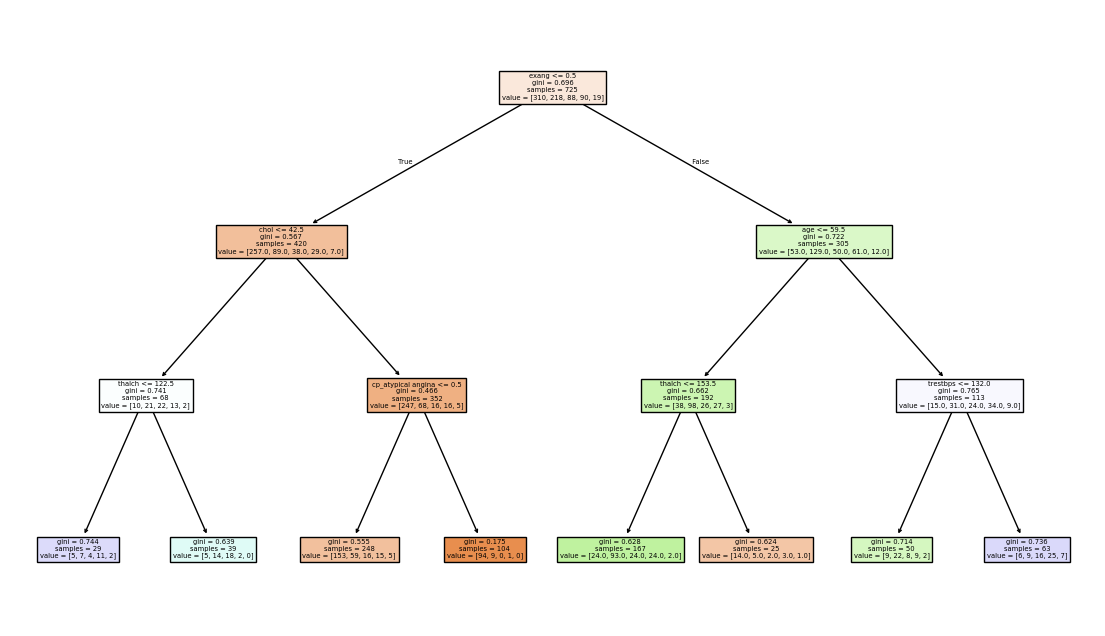

In [53]:
tree.plot_tree(dtr, feature_names=x.columns, filled=True);

### Interview Questions